In [6]:
import numpy
import scipy.special
import matplotlib.pyplot as plt


#### Get train and test data

In [25]:
train_data = numpy.genfromtxt('mnist_train.csv', delimiter=',')

In [26]:
train_data.shape

(60000, 785)

In [27]:
test_data = numpy.genfromtxt('mnist_test.csv', delimiter = ',')

In [28]:
test_data.shape

(10000, 785)

In [29]:
#Seems already greyscaled? Why 785 vs 784

In [30]:
test_data

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_train = []
for i in range(60000):
    y_train.append(train_data[i][0])
y_train = numpy.asarray(y_train)

In [32]:
y_train

array([5., 0., 4., ..., 5., 6., 8.])

In [33]:
y_train1 = numpy.empty((60000,10))
for i in range(len(y_train)):
    ans = y_train[i]
    newList = [0.01 for i in range(10)]
    y_train1[i] = numpy.asfarray(newList)
    y_train1[i][int(ans)] = 0.99

In [34]:
y_train1[0]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [35]:
y_train.shape

(60000,)

In [36]:
x_train = []
for i in range(60000):
    x_train.append(train_data[i][1:])
x_train = numpy.asarray(x_train)

In [38]:
x_train.shape

(60000, 784)

In [39]:
y_test = []
for i in range(10000):
    y_test.append(test_data[i][0])
y_test = numpy.asarray(y_test)

In [40]:
y_test1 = numpy.empty((60000,10))
for i in range(len(y_test)):
    ans = y_test[i]
    newList = [0.01 for i in range(10)]
    y_test1[i] = numpy.asfarray(newList)
    y_test1[i][int(ans)] = 0.99

In [41]:
x_test = []
for i in range(10000):
    x_test.append(test_data[i][1:])
x_test = numpy.asarray(x_test)

#### Normalize x_data between 0.01 and 0.99

In [43]:
x_train, x_test = x_train*(0.98/255)+0.01, x_test*(0.98/255)+0.01

#### Neural Network Class

In [10]:
class neuralNetwork:
      
    # initialise the neural network
    def __init__(self, inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=0.01):
        self.inodes = inputnodes #integers
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        #how do we make this a matrix for more than 1 layer?
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        
        self.whh = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.hnodes))
        
        self.who = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.onodes))
        
        
    #activation
    def sigmoid(self, z):
        return scipy.special.expit(z)
    
    #loss
    def MSEerror(self, Input, Targets):
        return sum((Input-Targets)**2).mean() #is this sse?
    
        
        
    # train the neural network
    def train(self, inputs_list, targets_list, count):
        
        hidden1Output = self.sigmoid(numpy.dot(self.wih,inputs_list.T)) #output from first hidden layer
        
        hidden2Output = self.sigmoid(numpy.dot(self.whh,hidden1Output))
        
        finalOutput = self.sigmoid(numpy.dot(self.who.T,hidden2Output)) #all for one
        
        MSEerror = self.MSEerror(finalOutput,targets_list)
        
        
        #Adjust weights
        
        #output to hidden
        Error = targets_list.T - finalOutput
        
        gradientho = Error*finalOutput*(1.0-finalOutput)
        Dwo = self.lr*numpy.dot(gradientho[:,None], (hidden2Output[:,None]).T)
        self.who += Dwo.T
        
        #hidden to hidden
        hidden2Errors = numpy.dot(self.who,Error)
        gradienthh = ((hidden2Errors *hidden2Output)*(1-hidden2Output))
        self.whh += self.lr*numpy.dot(gradienthh[:,None],(hidden1Output[:,None]).T)
                      
        
        
        #Hidden Layer Error
        hidden1Errors = numpy.dot(self.whh,hidden2Errors) #may or may not transpose
        gradientih = ((hidden1Errors * hidden1Output)*(1-hidden1Output))
        self.wih += self.lr*numpy.dot(gradientih[:,None],(inputs_list[:,None]).T)
        
        return MSEerror

        
        
        
        

    
    # query the neural network
    def query(self, inputs):
        inputs = inputs.T
        
        
        hidden1Output = self.sigmoid(numpy.dot(self.wih,inputs.T)) #output from first hidden layer
        
        hidden2Output = self.sigmoid(numpy.dot(self.whh,hidden1Output))
        
        finalOutput = self.sigmoid(numpy.dot(self.who.T,hidden2Output))
        
        res = finalOutput.argmax()
        

        return res
    
    #accuracy of network
    def get_accuracy(self, inputs, labels):
        correct = 0
        count = 0
        for i in range(len(inputs)):
            count +=1
            
            inputImage = inputs[i].T
            hidden1Output = self.sigmoid(numpy.dot(self.wih,inputImage)) #output from first hidden layer
            hidden2Output = self.sigmoid(numpy.dot(self.whh,hidden1Output))
            finalOutput = self.sigmoid(numpy.dot(self.who.T,hidden2Output))

            prediction = finalOutput.argmax()
            trueLabel = labels[i].argmax()
            #print(prediction,trueLabel)
            if trueLabel == prediction:
                correct+=1
        accuracy = correct/count
        return accuracy
        


#### Initial Model: 200 Hidden Nodes (default), 0.01 learning rate (default), 5 epochs

In [228]:
x_train_length = len(x_train)
x_train.shape

(60000, 784)

In [233]:
NN = neuralNetwork()
#training with 5 epochs
losses = []
for epoch in range(5):
    for i in range(len(x_train)):
        loss = NN.train(x_train[i], y_train1[i],i)
        #print(loss)
        if i == 59999:
            losses.append(loss)
            print(loss)

0.06009857876894957
0.04550539614726707
0.03146557564569505
0.016674859784132974
0.006003180633138381


([<matplotlib.axis.XTick at 0x223e46f1250>,
 <a list of 5 Text major ticklabel objects>)

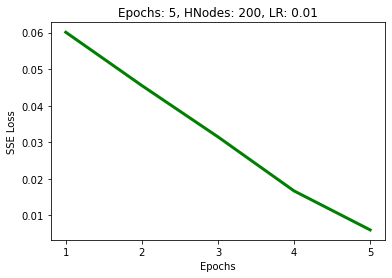

In [234]:
independent = [x for x in range(1,6)]
plt.plot(independent,losses, color = 'g', linewidth = 3)

plt.xlabel("Epochs")
plt.ylabel("SSE Loss")
plt.title("Epochs: 5, HNodes: 200, LR: 0.01")
plt.xticks(independent)

In [236]:
NN.get_accuracy(x_test,y_test1)

0.9643

In [99]:
epochs = [1, 5, 10, 15, 20 ]
LRs = [0.001, 0.01, 0.1, 0.2, 0.4, 0.6]

#### Finding the optimal number of hidden nodes

0.002856737660735922
0.0069162110156509755
0.01915812924673146
0.002255973012090996
0.01015128213233537
0.008809521627625045


([<matplotlib.axis.XTick at 0x223e9acc8e0>,
 <a list of 6 Text major ticklabel objects>)

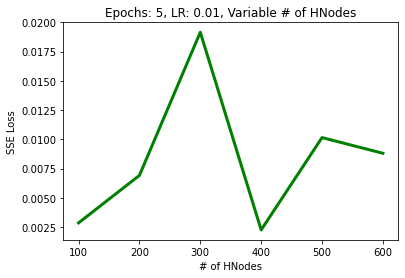

In [237]:
HNlosses = []
for Nodes in range(100,601,100):
    NN1 = neuralNetwork(inputnodes = 784, hiddennodes=Nodes, outputnodes=10, learningrate=0.01)
    for epoch in range(5):
        for i in range(len(x_train)):
            loss = NN1.train(x_train[i], y_train1[i],i)
            if epoch == 4 and i == 59999:
                HNlosses.append(loss)
                print(loss)

independent = [x for x in range(100,601,100)]
plt.plot(independent,HNlosses, color = 'g', linewidth = 3)

plt.xlabel("# of HNodes")
plt.ylabel("SSE Loss")
plt.title("Epochs: 5, LR: 0.01, Variable # of HNodes")
plt.xticks(independent)

#### Optimal Learning Rate

0.12158397712833352
0.0011385710667374189
0.00028790959147888544
0.0023573686172286322
0.02784429385873097
0.8555827734193355


([<matplotlib.axis.XTick at 0x22c8be9b190>,
 <a list of 6 Text major ticklabel objects>)

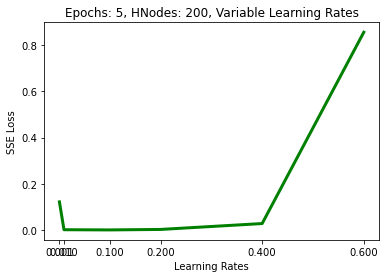

In [238]:
LRs = [0.001, 0.01, 0.1, 0.2, 0.4, 0.6]
LRlosses = []
for lr in LRs:
    NN2 = neuralNetwork(inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=lr)
    for epoch in range(5):
        for i in range(len(x_train)):
            loss = NN2.train(x_train[i], y_train1[i],i)
            if epoch == 4 and i == 59999:
                LRlosses.append(loss)
                print(loss)


plt.plot(LRs,LRlosses, color = 'g', linewidth = 3)

plt.xlabel("Learning Rates")
plt.ylabel("SSE Loss")
plt.title("Epochs: 5, HNodes: 200, Variable Learning Rates")
plt.xticks(LRs)

#### Optimal Epochs

0.05473093765657371
0.00268395935258004
0.0008282143696314265
0.0006363631490555703
0.0007332806091902007


([<matplotlib.axis.XTick at 0x223d6c11dc0>,
 <a list of 5 Text major ticklabel objects>)

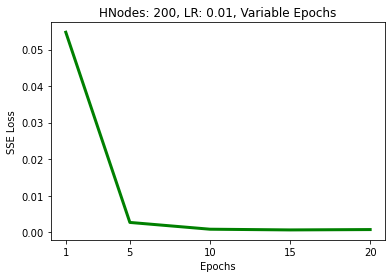

In [241]:
epochs = [1, 5, 10, 15, 20 ]
EPlosses = []
for e in epochs:
    NN3 = neuralNetwork(inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=0.01)
    for epoch in range(e):
        for i in range(len(x_train)):
            loss = NN3.train(x_train[i], y_train1[i],i)
            if epoch == e-1 and i == 59999:
                EPlosses.append(loss)
                print(loss)


plt.plot(epochs,EPlosses, color = 'g', linewidth = 3)

plt.xlabel("Epochs")
plt.ylabel("SSE Loss")
plt.title("HNodes: 200, LR: 0.01, Variable Epochs")
plt.xticks(epochs)

#### Final Hyperparameters

Based on the hyperparameter tests, the optimal model has 400 hidden nodes, a learning rate of 0.1, and trains for 10 epochs.

In [22]:
FinalNN = neuralNetwork(inputnodes = 784, hiddennodes=400, outputnodes=10, learningrate=0.1)
FinalEpochs = 10
for epoch in range(1,FinalEpochs+1):
        for i in range(len(x_train)):
            loss = FinalNN.train(x_train[i], y_train1[i],i)
            if i == len(x_train)-1:
                print("Epoch: ", epoch, "Loss: ", loss)

Epoch:  1 Loss:  0.003060987724275651
Epoch:  2 Loss:  0.0005157878783586587
Epoch:  3 Loss:  0.0046787213831958755
Epoch:  4 Loss:  0.015772263366660138
Epoch:  5 Loss:  0.010131581120580564
Epoch:  6 Loss:  0.008794194567797767
Epoch:  7 Loss:  0.007435783911653346
Epoch:  8 Loss:  0.03088310521255393
Epoch:  9 Loss:  0.051588964416463205
Epoch:  10 Loss:  0.14627541314101983


In [23]:
FinalNN.get_accuracy(x_test,y_test1)

0.9079

Oddly, our accuracy was lower than the original network?

#### Try on gimp images - SEE ACCURACY NOTEBOOK

#### Rotate images for new data - See Accuracy Notebook